Nama Kelompok:
1.   Alviatul Nazila (202010370311293)
2.   Clarissa Sanindita Reikisyifa (202010370311232)

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

#Load Dataset

In [ ]:
url = 'G:\My Drive\Batik Project\GAN\Icha\BatikGAN\ML\preprocessing\combine_data_proses.csv'
df = pd.read_csv(url)
df.tail()

,emoticon,convert_emoji,translate_emoji,cleaned,tokenize,normalization,stemmed,stopwords_stemmed,text_string_stemmed,label
3001,@kasrulsani9 @Cintada16 @Leonita_Lestari Prof ...,Prof pak Mahfud MD kok di LAWAN grinning_face ...,Prof pak Mahfud MD kok di LAWAN wajah menyerin...,prof pak mahfud md kok di lawan wajah menyerin...,"['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'mahfud', 'lawan', 'seringai', 'serin...",prof mahfud lawan seringai seringai bergulingg...,positive
3002,"@Melihat_Indo Alhamdulillah, semakin yakin kem...","Alhamdulillah, semakin yakin kemenangan Ganjar...","Alhamdulillah, semakin yakin kemenangan Ganjar...",alhamdulillah semakin yakin kemenangan ganjar ...,"['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'makin', 'yakin', 'menang', ...","['menang', 'ganjar', 'mahfud', 'semangat']",menang ganjar mahfud semangat,positive
3003,@gus_dibyo Pak Bas sosok yg berkarakter kuat d...,"Pak Bas sosok yg berkarakter kuat dan hebat, I...","Pak Bas sosok yg berkarakter kuat dan hebat, I...",pak bas sosok yg berkarakter kuat dan hebat in...,"['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'karakter', 'kua...","['sosok', 'karakter', 'kuat', 'hebat', 'insyaa...",sosok karakter kuat hebat insyaallah ganjar ma...,positive
3004,@Gus_Raharjo Indonesia harus di pimpin oleh or...,Indonesia harus di pimpin oleh orang yg bener2...,Indonesia harus di pimpin oleh orang yg bener2...,indonesia harus di pimpin oleh orang yg bener ...,"['indonesia', 'harus', 'di', 'pimpin', 'oleh',...","['indonesia', 'harus', 'di', 'pimpin', 'oleh',...","['indonesia', 'harus', 'di', 'pimpin', 'oleh',...","['indonesia', 'pimpin', 'paham', 'konstitusi',...",indonesia pimpin paham konstitusi ganjar mahfud,positive
3005,@Leony_aja @ganjarpranowo Gaspol Ganjar-Mahfud...,Gaspol Ganjar-Mahfud,Gaspol Ganjar-Mahfud,gaspol ganjarmahfud,"['gaspol', 'ganjarmahfud']","['gaspol', 'ganjarmahfud']","['gaspol', 'ganjarmahfud']","['gaspol', 'ganjarmahfud']",gaspol ganjarmahfud,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emoticon             3006 non-null   object
 1   convert_emoji        3004 non-null   object
 2   translate_emoji      3004 non-null   object
 3   cleaned              3004 non-null   object
 4   tokenize             3006 non-null   object
 5   normalization        3006 non-null   object
 6   stemmed              3006 non-null   object
 7   stopwords_stemmed    3006 non-null   object
 8   text_string_stemmed  2999 non-null   object
 9   label                3006 non-null   object
dtypes: object(10)
memory usage: 235.0+ KB


In [ ]:
df.describe()

,emoticon,convert_emoji,translate_emoji,cleaned,tokenize,normalization,stemmed,stopwords_stemmed,text_string_stemmed,label
count,3006,3004,3004,3004,3006,3006,3006,3006,2999,3006
unique,2939,2908,2908,2907,2908,2908,2908,2844,2843,3
top,Sosok Hardjanto yang telah melukis selama 50 t...,Bravo Gus Muhaimin Iskandar untuk Indonesia Ma...,Bravo Gus Muhaimin Iskandar untuk Indonesia Ma...,bravo gus muhaimin iskandar untuk indonesia ma...,"['bravo', 'gus', 'muhaimin', 'iskandar', 'untu...","['bravo', 'gus', 'muhaimin', 'iskandar', 'untu...","['bravo', 'gus', 'muhaimin', 'iskandar', 'untu...","['dukung', 'ganjar', 'mahfud']",dukung ganjar mahfud,positive
freq,4,8,8,8,8,8,8,14,14,1546


# Processing Data

In [ ]:
df.isnull().sum()

emoticon               0
convert_emoji          2
translate_emoji        2
cleaned                2
tokenize               0
normalization          0
stemmed                0
stopwords_stemmed      0
text_string_stemmed    7
label                  0
dtype: int64

In [ ]:
df.dropna(subset=['text_string_stemmed'], inplace=True)
df

,emoticon,convert_emoji,translate_emoji,cleaned,tokenize,normalization,stemmed,stopwords_stemmed,text_string_stemmed,label
0,@DPP_PKB @cakimiNOW Cak Imin sangat berkarisma...,Cak Imin sangat berkarismatik ....memang cocok...,Cak Imin sangat berkarismatik ....memang cocok...,cak imin sangat berkarismatik memang cocok men...,"['cak', 'imin', 'sangat', 'berkarismatik', 'me...","['cak', 'imin', 'sangat', 'berkarismatik', 'me...","['cak', 'imin', 'sangat', 'karismatik', 'meman...","['cak', 'imin', 'karismatik', 'cocok', 'dampin...",cak imin karismatik cocok damping anis,positive
1,@Adiprayitno_20 lho...lho gak bahaya tah kalau...,lho...lho gak bahaya tah kalau cawapres juga d...,lho...lho gak bahaya tah kalau cawapres juga d...,lholho gak bahaya tah kalau cawapres juga diun...,"['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'cawapres', 'undan...",lholho gak bahaya cawapres undang makan siang,negative
2,@FandiFrezian @sasbudiarjo @kikysaputrii Karna...,Karna posisinya pak Anis masih jadi Gubernur D...,Karna posisinya pak Anis masih jadi Gubernur D...,karna posisinya pak anis masih jadi gubernur d...,"['karna', 'posisinya', 'pak', 'anis', 'masih',...","['karena', 'posisinya', 'pak', 'anis', 'masih'...","['karena', 'posisi', 'pak', 'anis', 'masih', '...","['anis', 'gubernur', 'dki', 'cak', 'imin', 'da...",anis gubernur dki cak imin dateng lapor cawapr...,positive
3,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,cak imin tak khawatir yenny dukung ganjarmahfu...,"['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'khawatir', 'yenny', 'dukung',...",cak imin khawatir yenny dukung ganjarmahfud su...,neutral
4,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,susi pudjiastuti dikabarkan masuk calon kapten...,"['susi', 'pudjiastuti', 'dikabarkan', 'masuk',...","['susi', 'pudjiastuti', 'dikabarkan', 'masuk',...","['sus', 'pudjiastuti', 'kabar', 'masuk', 'calo...","['sus', 'pudjiastuti', 'kabar', 'calon', 'kapt...",sus pudjiastuti kabar calon kapten timnas mena...,positive
...,...,...,...,...,...,...,...,...,...,...
3001,@kasrulsani9 @Cintada16 @Leonita_Lestari Prof ...,Prof pak Mahfud MD kok di LAWAN grinning_face ...,Prof pak Mahfud MD kok di LAWAN wajah menyerin...,prof pak mahfud md kok di lawan wajah menyerin...,"['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'mahfud', 'lawan', 'seringai', 'serin...",prof mahfud lawan seringai seringai bergulingg...,positive
3002,"@Melihat_Indo Alhamdulillah, semakin yakin kem...","Alhamdulillah, semakin yakin kemenangan Ganjar...","Alhamdulillah, semakin yakin kemenangan Ganjar...",alhamdulillah semakin yakin kemenangan ganjar ...,"['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'makin', 'yakin', 'menang', ...","['menang', 'ganjar', 'mahfud', 'semangat']",menang ganjar mahfud semangat,positive
3003,@gus_dibyo Pak Bas sosok yg berkarakter kuat d...,"Pak Bas sosok yg berkarakter kuat dan hebat, I...","Pak Bas sosok yg berkarakter kuat dan hebat, I...",pak bas sosok yg berkarakter kuat dan hebat in...,"['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'karakter', 'kua...","['sosok', 'karakter', 'kuat', 'hebat', 'insyaa...",sosok karakter kuat hebat insyaallah ganjar ma...,positive
3004,@Gus_Raharjo Indonesia harus di pimpin oleh or...,Indonesia harus di pimpin oleh orang yg bener2...,

In [ ]:
df.duplicated().sum()

50

In [ ]:
df = df.drop_duplicates()

In [ ]:
unique_labels = df['label'].unique()
print(unique_labels)

['positive' 'negative' 'neutral']


In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text_string_stemmed'].values)
word_index = tokenizer.word_index

In [ ]:
X = tokenizer.texts_to_sequences(df['text_string_stemmed'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Spliting Dataset

Spliting Feature & Label

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['label'].values)
Y = to_categorical(integer_encoded)

Spliting Data Train and Data Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#Model LSTM

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(Y.shape[1], activation='softmax'))


#Compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training the Model

In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,validation_split=0.1)

Epoch 1/100
30/30 [==============================] - 32s 998ms/step - loss: 1.0015 - accuracy: 0.5127 - val_loss: 0.9201 - val_accuracy: 0.5314
Epoch 2/100
30/30 [==============================] - 29s 973ms/step - loss: 0.7934 - accuracy: 0.6230 - val_loss: 0.6676 - val_accuracy: 0.7198
Epoch 3/100
30/30 [==============================] - 29s 962ms/step - loss: 0.6135 - accuracy: 0.7480 - val_loss: 0.6217 - val_accuracy: 0.7101
Epoch 4/100
30/30 [==============================] - 29s 969ms/step - loss: 0.5099 - accuracy: 0.7781 - val_loss: 0.6157 - val_accuracy: 0.7488
Epoch 5/100
30/30 [==============================] - 30s 991ms/step - loss: 0.4036 - accuracy: 0.8481 - val_loss: 0.5932 - val_accuracy: 0.7536
Epoch 6/100
30/30 [==============================] - 28s 927ms/step - loss: 0.2962 - accuracy: 0.9020 - val_loss: 0.6214 - val_accuracy: 0.7536
Epoch 7/100
30/30 [==============================] - 28s 954ms/step - loss: 0.1947 - accuracy: 0.9456 - val_loss: 0.7175 - val_accuracy:

#Evaluating the Model

In [ ]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

28/28 [==============================] - 3s 112ms/step - loss: 2.4065 - accuracy: 0.6407
Test set
  Loss: 2.406
  Accuracy: 0.641


#Generating Predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)

28/28 [==============================] - 3s 96ms/step


In [ ]:
y_test_labels = Y_test.argmax(axis=1)

#Classification Report

In [ ]:
report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

    negative       0.59      0.49      0.54       225
     neutral       0.47      0.48      0.48       209
    positive       0.74      0.79      0.76       451

    accuracy                           0.64       885
   macro avg       0.60      0.59      0.59       885
weighted avg       0.64      0.64      0.64       885



#Plotting Training & Validation Accuracy and Loss

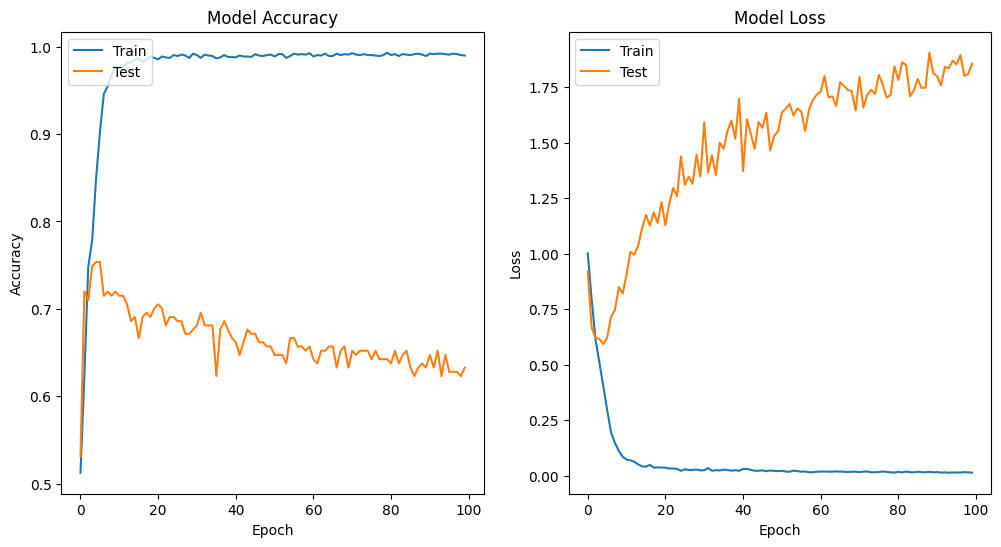

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
